In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.cross_validation import train_test_split

In [5]:
dataset = pd.read_csv('boston_dataset.csv', delimiter=';')
dataset.head()

,reg,CRIM,NOX,B,RM,CHAS,LSTAT,DIS,TAX,PTRATIO,ZN,INDUS,RAD,AGE,target
0,reg_1,0.00632,0.538,396.90,6.575,0.0,4.98,4.0900,296.0,15.3,18.0,2.31,1.0,65.2,24.0
1,reg_2,0.02731,0.469,396.90,6.421,0.0,9.14,4.9671,242.0,17.8,0.0,7.07,2.0,78.9,21.6
2,reg_3,0.02729,0.469,392.83,7.185,0.0,4.03,4.9671,242.0,17.8,0.0,7.07,2.0,61.1,34.7
3,reg_4,0.03237,0.458,394.63,6.998,0.0,2.94,6.0622,222.0,18.7,0.0,2.18,3.0,45.8,33.4
4,reg_5,0.06905,0.458,396.90,7.147,0.0,5.33,6.0622,222.0,18.7,0.0,2.18,3.0,54.2,36.2


In [13]:
# Split the dataset
train_set, test_set = train_test_split(dataset, test_size=0.2)
train_set, validation_set = train_test_split(train_set, test_size=0.2)

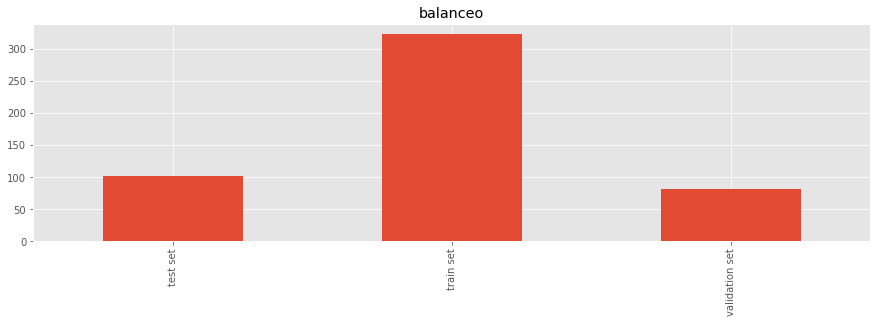

In [22]:
pd.DataFrame({'train set': [train_set.shape[0]],
              'validation set': [validation_set.shape[0]],
              'test set':[test_set.shape[0]]}).T.plot(kind='bar', 
                                                      figsize=(15, 4),
                                                      legend=False,
                                                      title='balanceo');

In [30]:
# dataset predict -- inside the experiment folder
target_table = test_set[['reg', 'target']]
target_table = target_table.sort_values(by=['reg'])
target_table.head()

,reg,target
0,reg_1,24.0
99,reg_100,33.2
104,reg_105,20.1
108,reg_109,19.8
10,reg_11,15.0


In [56]:
data = {}
# -- dataset for trainig
training_data = []
# train set - features
features_columns = list(set(train_set.columns) - {'reg', 'taget'})
train_features = train_set[features_columns].values
training_data.insert(0, train_features)
# train set - labet
train_label = train_set['target'].values
training_data.insert(1, train_label)
data['training_data'] = training_data
# -- dataset for validation
validation_data = []
validation_features = validation_set[features_columns].values
validation_data.insert(0, validation_features)
validation_label = validation_set['target'].values
validation_data.insert(1, validation_label)
data['validadtion_data'] = validation_data

In [69]:
# -- dataset for validation 
testing_data = []
test_set = test_set.sort_index(by=['reg'])   
testing_features = test_set[features_columns].values
testing_data.insert(0, testing_features)
data['testing_data'] = testing_data

/Users/tmorales/interpreters/anaconda3/envs/p3tf1/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  app.launch_new_instance()


In [70]:
data

{'testing_data': [array([[  18.    ,  396.9   ,    4.09  , ...,    2.31  ,    0.538 ,    0.    ],
         [   0.    ,  396.9   ,    3.4952, ...,    2.89  ,    0.445 ,    0.    ],
         [   0.    ,  392.69  ,    2.421 , ...,    8.56  ,    0.52  ,    0.    ],
         ..., 
         [  25.    ,  396.9   ,    5.4007, ...,    4.86  ,    0.426 ,    0.    ],
         [   0.    ,  357.98  ,    3.4952, ...,    2.89  ,    0.445 ,    0.    ],
         [   0.    ,  391.83  ,    3.4952, ...,    2.89  ,    0.445 ,    0.    ]])],
 'training_data': [array([[   0.    ,  372.08  ,    3.2157, ...,    6.2   ,    0.504 ,    0.    ],
         [   0.    ,  385.02  ,    1.9929, ...,   25.65  ,    0.581 ,    0.    ],
         [   0.    ,  390.74  ,    2.5091, ...,   18.1   ,    0.77  ,    0.    ],
         ..., 
         [   0.    ,  338.92  ,    1.7984, ...,   19.58  ,    0.605 ,    1.    ],
         [  22.    ,  396.9   ,    8.9067, ...,    5.86  ,    0.431 ,    0.    ],
         [   0.    ,  396.9   , 